## Algoritmo 1 : Fuerza Bruta !!

In [125]:
import time

def eval(func,n,repeticiones):
    repeticiones = range(repeticiones)
    start = time.time()
    for r in repeticiones:
        func(n)
    #func(n)
    end = time.time()
    return end - start

In [126]:
#https://github.com/snazrul1/PyRevolution/blob/master/Puzzles/N_Queen_Problem.ipynb
from itertools import permutations
def eight_queen_ver1(N):
    sol=0
    cols = range(N)
    for combo in permutations(cols):                      
        if N==len(set(combo[i]+i for i in cols))==len(set(combo[i]-i for i in cols)):
            #sol += 1
            #print('Solution '+str(sol)+': '+str(combo))  
            pass
            #print("\n".join(' o ' * i + ' X ' + ' o ' * (N-i-1) for i in combo) + "\n\n\n\n")


In [127]:
def eight_queen(N):
    sol=0
    cols = range(N)
    for combo in permutations(cols):
        #print(list(combo))
        if N==len(set(combo[i]+i for i in cols))==len(set(combo[i]-i for i in cols)):
            #sol += 1
            print('Solution '+str(sol)+': '+str(list(combo)))  
            #pass
            #print("\n".join(' o ' * i + ' X ' + ' o ' * (N-i-1) for i in combo) + "\n\n\n\n")
eight_queen(4)

Solution 0: [1, 3, 0, 2]
Solution 0: [2, 0, 3, 1]


In [128]:
import numpy as np
import matplotlib.pyplot as plt

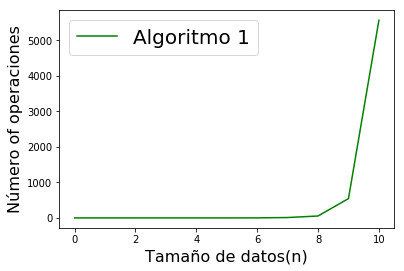

In [145]:
N = 11
X = np.arange(0, N)
Y = [eval(eight_queen_ver1,i,20) * 10 for i in X]
plt.plot(X, Y, c='green')
plt.xlabel('Tamaño de datos(n)', fontsize=16)
plt.ylabel('Número of operaciones', fontsize=16)
plt.legend(['Algoritmo 1'], loc='best', fontsize=20)

In [ ]:
#https://handcraftsman.wordpress.com/2015/06/20/evolving-a-genetic-solver-in-python-part-2/

In [146]:
import time
from functools import wraps
import numpy as np
#https://github.com/edorado93/Save-The-Queens/blob/master/n-queens-backtracking-optimized.py

def flat_matrix(sol):
    sol = np.array(sol)
    a = []
    for i in sol.T:
        result = np.where(i == 1)
        a.append(result[0][0])
    print(a)


class BacktrackingNQueensOptimizedSafetyCheck:
    def __init__(self, N):
        self.diagonals = {}
        self.anti_diagonals = {}
        self.rows = {}
        self.columns = {}
        self.N = N
        self.board = [[0 for x in range(N)] for y in range(N)]
        self.number_of_solutions = 0

    def is_cell_safe(self, r, c):
        if r in self.rows:
            return False
        if c in self.columns:
            return False
        if r - c in self.diagonals:
            return False
        if r + c  in self.anti_diagonals:
            return False

        return True

    def place_a_queen(self, r, c):
        self.rows[r] = True
        self.columns[c] = True
        self.diagonals[r - c] = True
        self.anti_diagonals[r + c] = True
        self.board[r][c] = 1
        

    def undo_placing_a_queen(self, r, c):
        del self.rows[r]
        del self.columns[c]
        del self.diagonals[r - c]
        del self.anti_diagonals[r + c]
        self.board[r][c] = 0

    def run(self):
        self.solve(0)

    def solve(self, column):
        if column == self.N:
            self.number_of_solutions += 1
            #flat_matrix(self.board)
            #print("nro. soluciones:", self.number_of_solutions)
            return
        for i in range(self.N):
            if self.is_cell_safe(i, column):
                self.place_a_queen(i, column)
                self.solve(column + 1)
                self.undo_placing_a_queen(i, column)

    def get_number_of_solutions(self):
        return self.number_of_solutions

In [147]:
def eight_queen_ver2(N):
    solver = BacktrackingNQueensOptimizedSafetyCheck(i)
    solver.run()

In [148]:
#https://medium.freecodecamp.org/lets-backtrack-and-save-some-queens-1f9ef6af5415

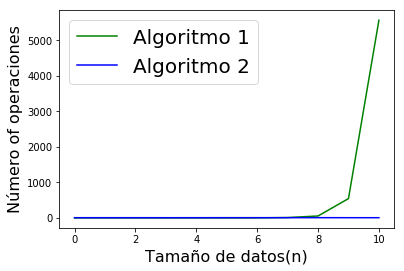

In [149]:
#N = 11
#X = np.arange(0, N)
Y2 = [eval(eight_queen_ver2,i,20) * 10 for i in X]
plt.plot(X, Y, c='green')
plt.plot(X, Y2, c='blue')
plt.xlabel('Tamaño de datos(n)', fontsize=16)
plt.ylabel('Número of operaciones', fontsize=16)
plt.legend(['Algoritmo 1','Algoritmo 2'], loc='best', fontsize=20)

In [7]:
#https://github.com/johnbhurst/nqueens
#http://www.ic-net.or.jp/home/takaken/e/queen/
#http://deepgreen.game.coocan.jp/NQueens/nqueen_index.htm

MetaData(bind=None)
